<a href="https://colab.research.google.com/github/jameVee/MNIST-data-with-Kmean-and-SVM/blob/main/MNIST_BMGGFDN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# บะหมี่เกี๊ยวก็เฟี้ยวดีนะ (Scikit-learn)

ศึกษา MNIST dataset ด้วย scikit-learn

* Load 
* Explore 
* Pre-process
* Unsupervised Learning (t-SNE)
* Supervised Learning (Artificial Neural Network)

# Load Data

In [ ]:
from sklearn import datasets
digits = datasets.load_digits()

In [ ]:
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [ ]:
print(type(digits.data))
print(digits.data.shape)
print(digits.data[0])

<class 'numpy.ndarray'>
(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [ ]:
print(digits.target[0])

0


In [ ]:
print(digits.images[0])
print(digits.images.shape)

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
(1797, 8, 8)


# Explore MNIST data

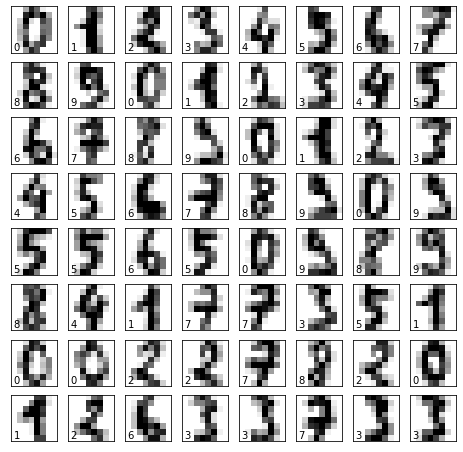

In [ ]:
import matplotlib.pyplot as plt

images_and_labels = list(zip(digits.images, digits.target))

fig = plt.figure(figsize=(8,8))

for index, (image, label) in enumerate(images_and_labels[:64]):
  ax = fig.add_subplot(8, 8, index+1, xticks=[], yticks=[])
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  ax.text(0, 7, str(label))

plt.show()

# Dimensionality Reduction
* PCA (Principal Component Analysis)

In [ ]:
from sklearn.decomposition import PCA

# digits.data (1797, 64)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(digits.data) 

In [ ]:
digits.data.shape, reduced_data.shape

((1797, 64), (1797, 2))

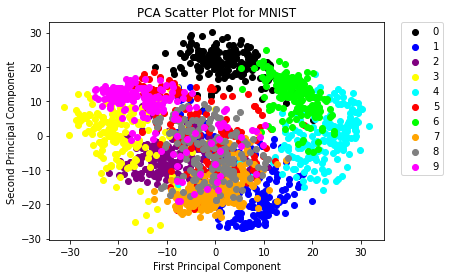

In [ ]:
colors = ['black', 'blue', 'purple', 'yellow', 'cyan', 'red', 'lime','orange', 'gray','magenta']

for i in range(len(colors)):
  x = reduced_data[:, 0][digits.target == i]
  y = reduced_data[:, 1][digits.target == i]
  plt.scatter(x, y, c=colors[i])

plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot for MNIST")
plt.show()

*  t-SNE (t-Distributed Stochastic Neighbor Embedding) by Weerathep 

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
reduced_data_tsne = tsne.fit_transform(digits.data) 
reduced_data_tsne.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(1797, 2)

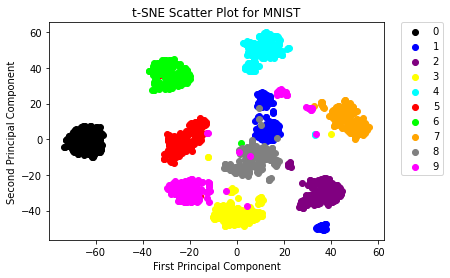

In [ ]:
colors = ['black', 'blue', 'purple', 'yellow', 'cyan', 'red', 'lime','orange', 'gray','magenta']

for i in range(len(colors)):
  x = reduced_data_tsne[:, 0][digits.target == i]
  y = reduced_data_tsne[:, 1][digits.target == i]
  plt.scatter(x, y, c=colors[i])

plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("t-SNE Scatter Plot for MNIST")
plt.show()

# Preprocessing

In [ ]:
# scale ข้อมูล ให้อยู่ในช่วงมาตรฐาน
from sklearn.preprocessing import scale

data = scale(digits.data)

In [ ]:
# แบ่งข้อมูลเป็น training, test datasets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.33, random_state=41) 
#2/3 train, 1/3 test

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1203, 64), (594, 64), (1203,), (594,))

# Clustering using K-means

In [ ]:
from sklearn import cluster

clf = cluster.KMeans(n_clusters=10, random_state=42)

clf.fit(X_train)


KMeans(n_clusters=10, random_state=42)

In [ ]:
y_pred = clf.predict(X_test)
y_pred.shape

(594,)

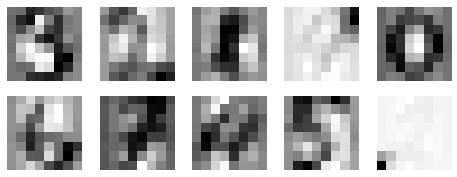

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,3))

for i in range(10):
  ax = fig.add_subplot(2, 5, 1+i)
  ax.imshow(clf.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.gray_r, interpolation='nearest')
  plt.axis('off')

plt.show()

# Supervised Learning (SVM)


In [ ]:
from sklearn.svm import SVC

clf_svm = SVC(C=10, kernel='rbf', gamma=0.001)

clf_svm.fit(X_train, y_train)

y_pred_svm = clf_svm.predict(X_test)

In [ ]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       0.95      0.98      0.97        63
           2       0.98      1.00      0.99        56
           3       0.98      0.97      0.97        59
           4       0.98      0.98      0.98        56
           5       0.98      1.00      0.99        61
           6       1.00      1.00      1.00        64
           7       1.00      1.00      1.00        59
           8       0.94      0.92      0.93        51
           9       0.99      0.96      0.97        69

    accuracy                           0.98       594
   macro avg       0.98      0.98      0.98       594
weighted avg       0.98      0.98      0.98       594



# Supervised Learning (Artificial Neural Network) by Weerathep

In [ ]:
from sklearn.neural_network import MLPClassifier

clf_nn = MLPClassifier()  #learning rate = 0.001 , hidden_layer_sizes = (100,)  , activation function = rectified linear unit function 
clf_nn.fit(X_train, y_train)
y_pred_nn = clf_nn.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
print(metrics.classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       0.95      0.97      0.96        63
           2       0.97      1.00      0.98        56
           3       0.97      0.95      0.96        59
           4       1.00      0.96      0.98        56
           5       0.98      1.00      0.99        61
           6       1.00      0.98      0.99        64
           7       1.00      0.98      0.99        59
           8       0.91      0.96      0.93        51
           9       0.96      0.93      0.94        69

    accuracy                           0.97       594
   macro avg       0.97      0.97      0.97       594
weighted avg       0.97      0.97      0.97       594

